In [4]:
import pandas as pd

file_path = f'coef.csv'
df = pd.read_csv(file_path)

# delete column
df = df.iloc[:, 1:-2]

new_columns = ['a1', 'd', 'g', 'u']
data = {col: [] for col in new_columns}
for i in range(0, len(df.columns), 4):
    for col, new_col in zip(df.columns[i:i+4], new_columns):
        data[new_col].append(df[col].values[0])

new_df = pd.DataFrame(data)
columns_order = ['g', 'a1', 'd', 'u']
new_df = new_df[columns_order]
new_df.to_csv(f'clean_coef.csv', index=False)

/Users/tyhhh/anaconda3/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


0.4548891252373536 3.863851492349928 1.8183451675005396e-05 0.851578149836764
0.21631136362126255 -0.3077433473021994 1.498526380109833
-0.44651776605570387 1.1461954060033157


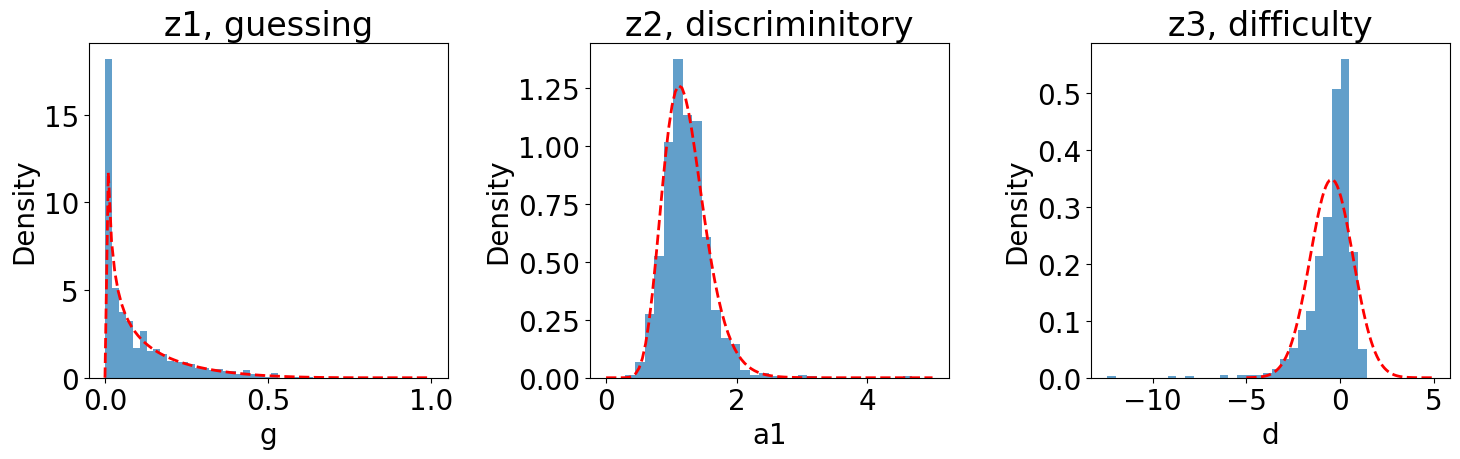

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta, lognorm, norm
import numpy as np

df = pd.read_csv('clean_coef.csv')
df_subset = df.iloc[:, :3]

plt.rcParams.update({'font.size': 20})
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df_subset.iloc[:, 0], bins=30, density=True, alpha=0.7)
axes[0].set_title(f'z1, guessing')
axes[0].set_xlabel(df_subset.columns[0])
axes[0].set_ylabel('Density')
# fit a beta distribution
a, b, loc, scale = beta.fit(df_subset.iloc[:, 0])
print(a, b, loc, scale)
x = np.linspace(0, 1, 100)
y = beta.pdf(x, a, b, loc, scale)
axes[0].plot(x, y, 'r--', lw=2)

axes[1].hist(df_subset.iloc[:, 1], bins=30, density=True, alpha=0.7)
axes[1].set_title(f'z2, discriminitory')
axes[1].set_xlabel(df_subset.columns[1])
axes[1].set_ylabel('Density')
# fit a log normal distribution
shape, loc, scale = lognorm.fit(df_subset.iloc[:, 1])
print(shape, loc, scale)
x = np.linspace(0, 5, 100)
y = lognorm.pdf(x, shape, loc, scale)
axes[1].plot(x, y, 'r--', lw=2)

axes[2].hist(df_subset.iloc[:, 2], bins=30, density=True, alpha=0.7)
axes[2].set_title(f'z3, difficulty')
axes[2].set_xlabel(df_subset.columns[2])
axes[2].set_ylabel('Density')
# fit a normal distribution
loc, scale = norm.fit(df_subset.iloc[:, 2])
print(loc, scale)
x = np.linspace(-5, 5, 100)
y = norm.pdf(x, loc, scale)
axes[2].plot(x, y, 'r--', lw=2)

plt.tight_layout()
plt.show()